In [38]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.linear_model import LinearRegression       # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

무게,길이,대각선,높이,넓이 - 어떤 물고기인지 분류하는 모델 구현

In [39]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [40]:
# 데이터 확인
df[df['Weight']==0]
df.groupby('Species').count()
# df['Species'].value_counts()


,Weight,Length,Diagonal,Height,Width
Species,,,,,
Bream,35,35,35,35,35
Parkki,11,11,11,11,11
Perch,56,56,56,56,56
Pike,17,17,17,17,17
Roach,20,20,20,20,20
Smelt,14,14,14,14,14
Whitefish,6,6,6,6,6


In [41]:
# 데이터 전처리
df['Species'].values              # target
np.array(df.iloc[:,1:])           # input
# df.iloc[:,1:].to_numpy()

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [42]:
# 데이터 전처리 - input, target 확보
fish_input = np.array(df.iloc[:,1:])  
fish_target = df['Species'].to_numpy()

In [43]:
# 데이터 전처리 - train, test 분리 및 섞기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,random_state=42)

In [44]:
# knn 모델 적용
# 1. 표준화 작업    >>   (data-avg)/std
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)     # 변환하는 것.  (data-avg)/std  의 공식을 구함
train_scaled = ss.transform(train_input)  # 공식을 적용
test_scaled = ss.transform(test_input)    # 공식을 적용

train_input

array([[7.20000e+02, 3.50000e+01, 4.06000e+01, 1.63618e+01, 6.09000e+00],
       [5.00000e+02, 4.50000e+01, 4.80000e+01, 6.96000e+00, 4.89600e+00],
       [7.50000e+00, 1.05000e+01, 1.16000e+01, 1.97200e+00, 1.16000e+00],
       [1.10000e+02, 2.20000e+01, 2.35000e+01, 5.52250e+00, 3.99500e+00],
       [1.40000e+02, 2.07000e+01, 2.32000e+01, 8.53760e+00, 3.29440e+00],
       [6.90000e+01, 1.82000e+01, 2.03000e+01, 5.29830e+00, 2.82170e+00],
       [1.10000e+02, 2.10000e+01, 2.25000e+01, 5.69250e+00, 3.55500e+00],
       [6.20000e+02, 3.45000e+01, 3.97000e+01, 1.55227e+01, 5.28010e+00],
       [1.30000e+02, 2.13000e+01, 2.28000e+01, 6.38400e+00, 3.53400e+00],
       [8.50000e+01, 2.00000e+01, 2.10000e+01, 5.08200e+00, 2.77200e+00],
       [6.85000e+02, 3.65000e+01, 3.90000e+01, 1.08810e+01, 6.86400e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.14000e+02, 3.28000e+01, 3.40000e+01, 1.00300e+01, 6.01800e+00],
       [2.00000e+02, 2.30000e+01, 2.58

1. 데이터 변환 - fit, transform 
2. 데이터 측정 - 분류, 회귀 fit, predict, score

In [45]:
# 데이터 학습
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = 5
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# 데이터 예측
kn.predict(test_scaled)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Roach', 'Pike', 'Bream',
       'Perch', 'Roach', 'Perch', 'Parkki', 'Perch'], dtype=object)

In [47]:
# 정답률
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [48]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [49]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

## knn 분류에서 proba 기능

In [50]:
# predict : 분류한 값 출력
# predict_proba : 각 특성별로 분류 퍼센트 출력
proba = kn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [51]:
test_scaled[3:4]
# test_scaled[3]
# test_scaled

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [52]:
# n_neighbors의 주소값 출력
distances, indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[104, 115, 106]], dtype=int64)

In [53]:
train_target[indexes] # [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.  ]

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [54]:
distances, indexes = kn.kneighbors(test_scaled[4:5])
indexes

array([[72, 26, 68]], dtype=int64)

In [55]:
train_target[indexes] # [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.  ]

array([['Perch', 'Perch', 'Roach']], dtype=object)

In [56]:
distances, indexes = kn.kneighbors(test_scaled[0:2])
indexes

array([[39, 64, 63],
       [93, 99, 43]], dtype=int64)

In [57]:
train_target[indexes]

array([['Perch', 'Perch', 'Perch'],
       ['Smelt', 'Smelt', 'Smelt']], dtype=object)

# 로지스틱 회귀 - 분류 (이름만 회귀)

In [58]:
z = np.arange(-5,5,0.1)
z

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

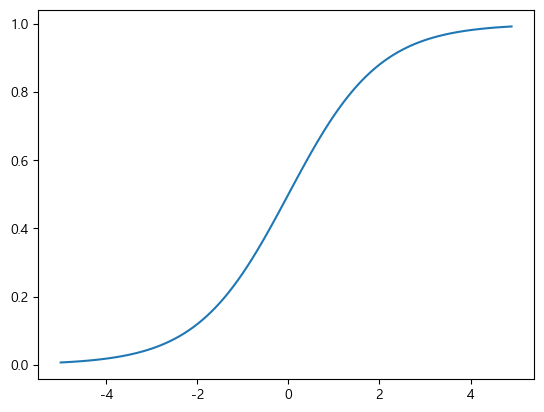

100

In [59]:
phi = 1 / (1+np.exp(-z))

# 그래프
plt.plot(z,phi)
plt.show()
len(phi)

In [60]:
# 로지스틱 회귀로 이진 분류
char_arr = np.array(['A','B','C','D','E','A','B','C'])
char_arr[[True,False,True,False,False,True,False,True]] # A, C 만 뽑을 때



array(['A', 'C', 'A', 'C'], dtype='<U1')

### 이진분류형태, 다항분류형태로 분류모델 적용

In [61]:

b_s_df = df[(df['Species']=='Bream') | (df['Species']=='Smelt')]

fish_target = np.array(b_s_df.iloc[:,0])
fish_input = np.array(b_s_df.iloc[:,1:])

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=1)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)






In [62]:
# Logistic Regression - 로지스틱 회귀 모델을 적용해서 정답률을 출력하시오.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

knr = KNeighborsClassifier()
knr.fit(train_scaled,train_target)
knr.predict(test_scaled)

train_scaled

array([[-1.48750416, -1.84656094, -1.841563  , -1.74150119, -1.78167961],
       [ 0.72791047,  0.65024697,  0.63655313,  0.49136186,  0.76009415],
       [-1.47613953, -1.63585985, -1.63727385, -1.65820059, -1.65339607],
       [-1.4847491 , -1.77281556, -1.7705059 , -1.70061359, -1.72063359],
       [ 0.96897844,  0.80827279,  0.80531372,  0.82239016,  0.95691868],
       [ 0.62459563,  0.75559752,  0.72537449,  0.67526842,  0.51705061],
       [-0.33967625,  0.49222116,  0.51220321,  0.3930177 ,  0.40446307],
       [-1.4806165 , -1.68853512, -1.68168454, -1.69952653, -1.65263571],
       [ 0.90010188,  0.5975717 ,  0.61878885,  0.57275134,  0.47218939],
       [-1.46856311, -1.59371963, -1.61062745, -1.67985419, -1.59376215],
       [ 0.90010188,  0.80827279,  0.79643159,  0.80112229,  0.68481854],
       [ 0.83122531,  0.80827279,  0.80531372,  0.66578292,  0.97896911],
       [-0.02973172,  0.17616952,  0.2190927 ,  0.13547137,  0.43770165],
       [ 1.67496321,  1.28235024,  1.2

In [63]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [64]:
lr.predict(test_scaled)

array(['Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt', 'Bream'], dtype=object)

In [65]:
proba = lr.predict_proba(test_scaled)
np.round(proba,decimals=4)


array([[9.978e-01, 2.200e-03],
       [9.995e-01, 5.000e-04],
       [4.110e-02, 9.589e-01],
       [9.960e-02, 9.004e-01],
       [9.456e-01, 5.440e-02],
       [9.614e-01, 3.860e-02],
       [4.390e-02, 9.561e-01],
       [9.994e-01, 6.000e-04],
       [5.090e-02, 9.491e-01],
       [9.993e-01, 7.000e-04],
       [9.994e-01, 6.000e-04],
       [4.170e-02, 9.583e-01],
       [9.958e-01, 4.200e-03]])

In [66]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

1.0
1.0


In [76]:
# 기울기가 5개 나옴. columns가 5개이기 때문
lr.coef_
lr.intercept_


array([-2.89304478])

In [75]:
decisions = lr.decision_function(train_scaled)
decisions



array([ 3.51896907, -5.25859569,  3.03209787,  3.32795788, -6.06186921,
       -5.31447361, -4.08878057,  3.14156501, -5.15339922,  2.94835305,
       -5.79418669, -5.87280693, -3.61684055, -7.75277144, -4.78010369,
       -4.26143029, -6.58407564,  2.25780369, -7.99260345, -5.09613318,
       -5.23487051, -6.07713527, -4.14982506, -3.53738364,  2.8873064 ,
       -2.60342568, -5.16437959, -2.10235636, -5.01579449, -3.84024827,
       -4.20784833, -4.22263418, -3.91472735, -3.9918158 ,  3.06638309,
        3.3604664 ])

In [69]:
train_scaled[0]

array([-1.48750416, -1.84656094, -1.841563  , -1.74150119, -1.78167961])

In [77]:
z = 0
for i in range(5):
    z += lr.coef_[0][i] * train_scaled[0][i]

# z = 1.29007669*-0.59370656 + 0.89526782 * -0.76740212 + 0.87973344 * -0.78830062 + 0.88336219 * -0.80803482 + 1.00096286 * -0.76687467
z-2.89304478


3.5189690749984828

In [78]:
# 시그모이드 함수
# phi = 1/ (1+np.exp(-z))
from scipy.special import expit

expit(decisions)

array([9.71222704e-01, 5.17567863e-03, 9.54003317e-01, 9.65375576e-01,
       2.32462500e-03, 4.89578124e-03, 1.64834022e-02, 9.58575070e-01,
       5.74651152e-03, 9.50185591e-01, 3.03596098e-03, 2.80705909e-03,
       2.61644571e-02, 4.29365981e-04, 8.32523702e-03, 1.39060136e-02,
       1.38029658e-03, 9.05321543e-01, 3.37838919e-04, 6.08313620e-03,
       5.29928232e-03, 2.28948728e-03, 1.55224297e-02, 2.82670657e-02,
       9.47215368e-01, 6.89182746e-02, 5.68411454e-03, 1.08868006e-01,
       6.58866223e-03, 2.10362336e-02, 1.46602272e-02, 1.44481668e-02,
       1.95559240e-02, 1.81313367e-02, 9.55484585e-01, 9.66445905e-01])